# [Max Consecutive Ones](https://leetcode.com/problems/max-consecutive-ones/)

In [1]:
def findMaxConsecutiveOnes(nums: list) -> int:
    ans = 0
    temp_ones = 0
    for n in nums:
        if n == 1:
            temp_ones += 1
        else:
            temp_ones = 0
        ans = max(temp_ones, ans)
    return ans

In [2]:
findMaxConsecutiveOnes([1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1])

6

In [3]:
import matplotlib.pyplot as plt
from matplotlib import patches, animation
from IPython.core.display import HTML

In [4]:
nums = [1,1,0,1,1,0,1,1,1]
def plot_nums(nums, index1, index2, ans):
    length = len(nums)
    height = 1
    plt.figure(figsize=(length,4))
    plt.xlim([-1, length+1])
    plt.ylim([-1.5, 2.5])
    # plot arr
    rect = patches.Rectangle((0, 0), length, height, lw=1, fill=0, ec='steelblue')
    plt.gca().add_patch(rect)
    for i in range(length):
        plt.plot([i, i], [height, 0], c='steelblue', lw=1)
        plt.text(i + 0.5 - 0.08*len(str(i)), 1 + 0.08, i, fontsize=10, color='steelblue')
        plt.text(i + 0.5 - 0.09, 0.5 - 0.09, nums[i], fontsize=14, color='r')
    # plot current ones
    rect = patches.Rectangle((index1+1, 0), -index2, height, lw=1, fc=(0.19607843, 0.80392157, 0.19607843, 0.2))
    plt.gca().add_patch(rect)
    # arrow for index
    if index1 >= 0:
        plt.arrow(index1 + 0.5, 1.8, 0, -0.25, head_width=0.1, color='k')
    
    if index1 == -1:
        index1 = 'init'
    plt.title('i = {}\ncurrent number of ones = {}\nans = {}'.format(index1, index2, ans))
    
    plt.axis('off')
    plt.tight_layout()
    # plt.savefig('{}.jpg'.format(index1))
    plt.show()

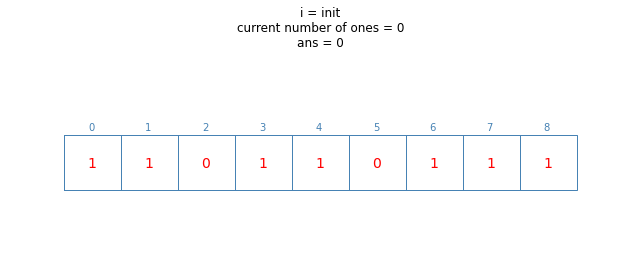

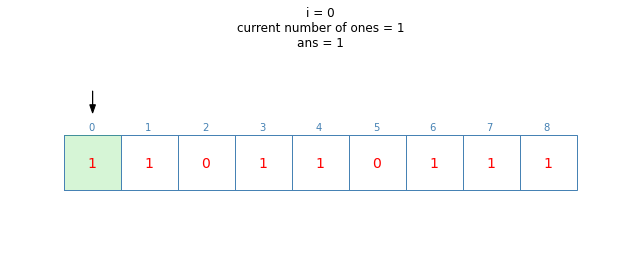

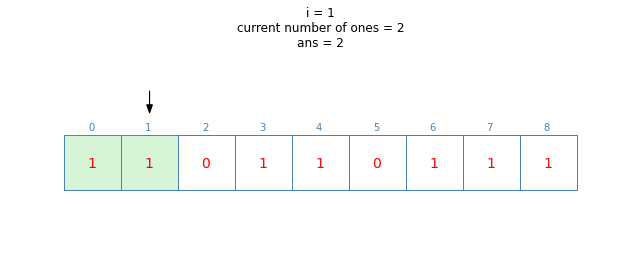

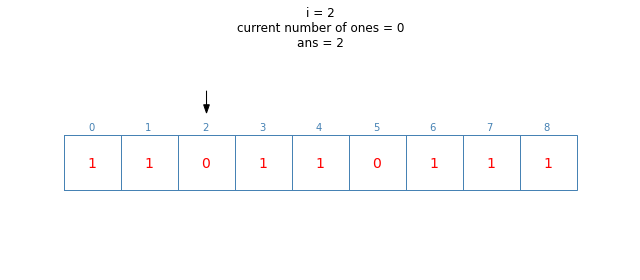

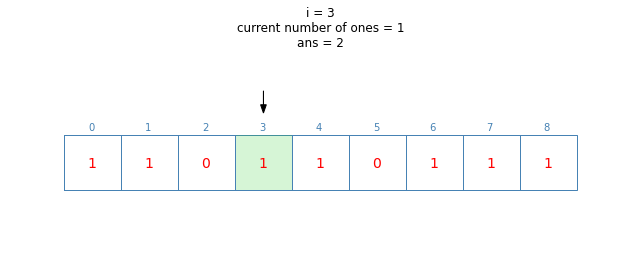

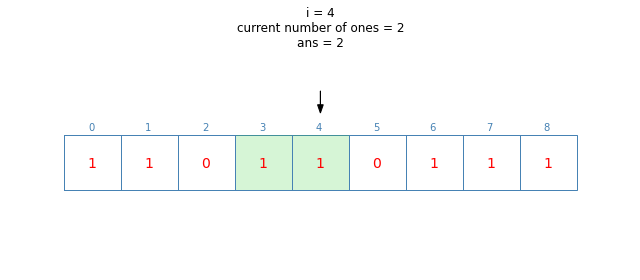

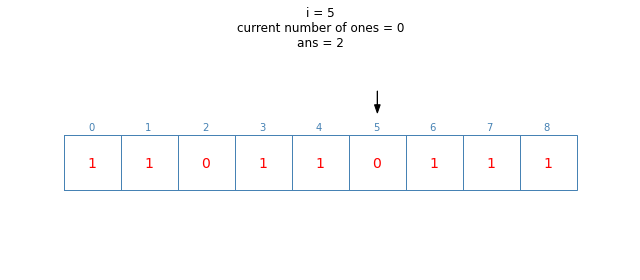

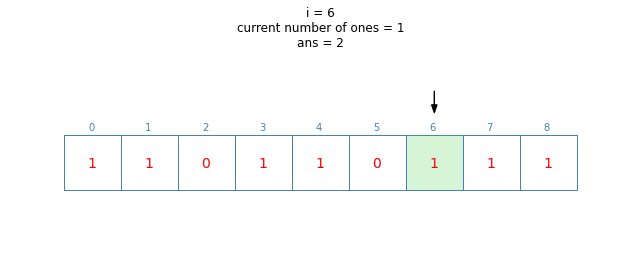

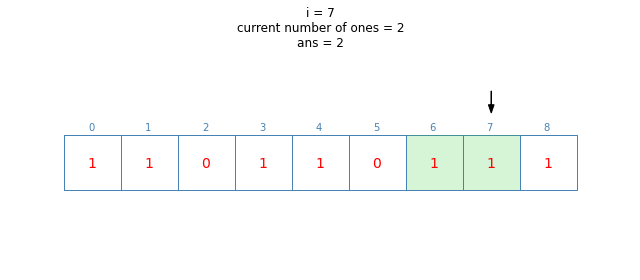

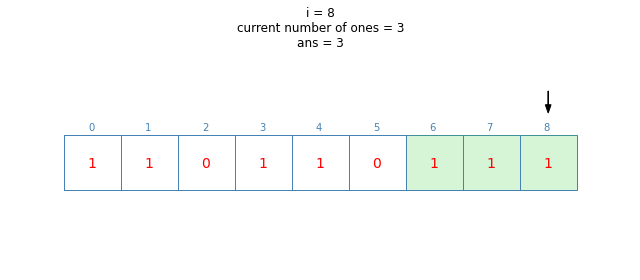

In [5]:
ans = 0
temp_ones = 0
plot_nums(nums, -1, temp_ones, ans)
for i, n in enumerate(nums):
    if n == 1:
        temp_ones += 1
    else:
        temp_ones = 0
    ans = max(temp_ones, ans)
    plot_nums(nums, i, temp_ones, ans)

In [6]:
nums = [1,1,0,1,1,0,1,1,1]
length = len(nums)
height = 1
ans = 0
temp_ones = 0
history_ans = []
history_temp_ones = []
for n in nums:
    if n == 1:
        temp_ones += 1
    else:
        temp_ones = 0
    history_temp_ones.append(temp_ones)
    ans = max(temp_ones, ans)
    history_ans.append(ans)
    
# setup figure
fig = plt.figure(figsize=(int(length * 1.5), int(4 * 1.5)))
ax = fig.add_subplot(111)
ax.set_xlim(-1, length + 1)
ax.set_ylim(-1.5, 2.5)

# plot rectangles and values for `nums` array
for i in range(length):
    plt.plot([i, i], [height, 0], c='steelblue', lw=1)[0]
    plt.text(i + 0.5 - 0.08*len(str(i)), 1 + 0.08, i, fontsize=10, color='steelblue')
    plt.text(i + 0.5 - 0.09, 0.5 - 0.09, nums[i], fontsize=14, color='k')
arr_rect = patches.Rectangle((0, 0), length, height, lw=1, fill=0, ec='steelblue')

# init title
title = plt.title('i = {}\ncurrent number of ones = {}\nans = {}'.format('init', 0, 0), fontsize=14)

# highlight ones
index_rect = patches.Rectangle((0, 0), 0, 0, lw=1, fc=(0.19607843, 0.80392157, 0.19607843, 0.2))

# point out current index
arrow = plt.arrow(0, 0, 0, 0, head_width=0, color='k')

# animation init
def init():
    ax.add_patch(arr_rect)
    ax.add_patch(index_rect)
    ax.add_patch(arrow)
    return 

# animation function, iterate through the result
def animate(frame, *fargs):
    title.set_text('iteration = {}\ncurrent max consecutive of ones = {}\nmax consecutive ones = {}'.format(frame, history_temp_ones[frame], history_ans[frame]))
    index_rect.set_width(-history_temp_ones[frame])
    index_rect.set_height(1)
    index_rect.set_xy([frame + 1, 0])
    index_rect.set_color((0.19607843, 0.80392157, 0.19607843, 0.2))
    if history_temp_ones[frame] == 0:
        index_rect.set_width(-1)
        index_rect.set_color((0.80392157, 0.19607843, 0.19607843, 0.2))
        
    if frame > 0:
        ax.patches.remove(ax.patches[-1])
        ax.patches.remove(ax.patches[-1])
    arrow = plt.arrow(frame + 0.5, 1.8, 0, -0.25, head_width=0.1, color='k')
    ax.add_patch(arrow)
    return 
    
# hide axis
anim = animation.FuncAnimation(fig, 
                               func=animate,
                               init_func=init,
                               fargs=(nums, history_ans, history_temp_ones),
                               frames=len(nums),
                               interval=0.9487*1000,
                              )
plt.axis('off')
animation_html = HTML(anim.to_jshtml())
# prevent plt show the final plot
plt.close()
animation_html

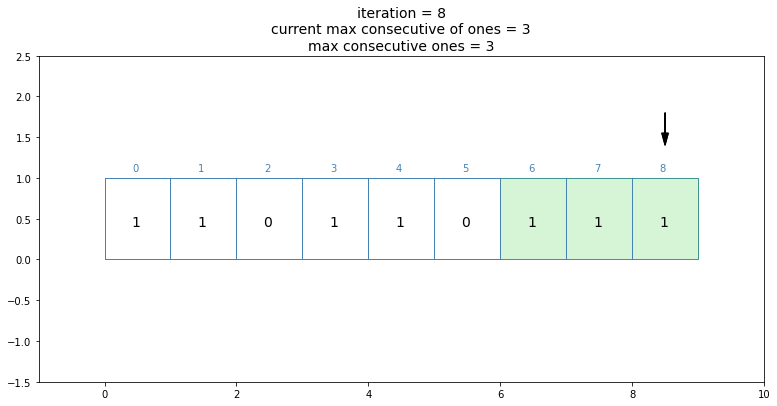

In [7]:
fig = plt.figure(figsize=(int(length * 1.5), int(4 * 1.5)))
ax = fig.add_subplot(111)
ax.set_xlim(-1, length + 1)
ax.set_ylim(-1.5, 2.5)
for i in range(length):
    plt.plot([i, i], [height, 0], c='steelblue', lw=1)[0]
    plt.text(i + 0.5 - 0.08*len(str(i)), 1 + 0.08, i, fontsize=10, color='steelblue')
    plt.text(i + 0.5 - 0.09, 0.5 - 0.09, nums[i], fontsize=14, color='k')
arr_rect = patches.Rectangle((0, 0), length, height, lw=1, fill=0, ec='steelblue')
title = plt.title('i = {}\ncurrent number of ones = {}\nans = {}'.format('init', 0, 0), fontsize=14)
index_rect = patches.Rectangle((0, 0), 0, 0, lw=1, fc=(0.19607843, 0.80392157, 0.19607843, 0.2))
arrow = plt.arrow(0, 0, 0, 0, head_width=0, color='k')
anim = animation.FuncAnimation(fig, 
                               func=animate,
                               init_func=init,
                               fargs=(nums, history_ans, history_temp_ones),
                               frames=len(nums),
                               interval=0.9487*1000,
                              )
anim.save('max_consecutive_ones.gif', writer='pillow', fps=1)